This notebook attempts to detect straggler of MD analysis by plotting RMSD across multiple resources using up to 768 cores. The test script is written by mpi4py and the data file is parsed to represent a histogram of execution time each frame. Data file contains [total size]\s[argument]\s[mean value of each execution time]\s[index]\s[total execution time] where I pick up the last column to display.

### Straggler definition

"straggler is a task has high runtime if its time to finish is longer than 1.5x the median task duration in its phase" from [1].

[1] [Ananthanarayanan, Ganesh, et al. "Reining in the Outliers in Map-Reduce Clusters using Mantri." Osdi. Vol. 10. No. 1. 2010](https://www.usenix.org/legacy/event/osdi10/tech/full_papers/Ananthanarayanan.pdf)

### Impact of Stragglers

In [38]:
from IPython.display import display, Math, Latex
display(Math(r'TTX_i = f(datasize,code,machine,network)'))
display("""The completion time of task i, as a function of the size of the data it processes, the code it runs, the resources
available on the machine it executes and the bandwidth available on the network paths involved and the total completion time of tasks are:""")
display(Math(r'\frac{\sum_{n} ttx_i}{s} + max (ttx_i)'))
display("where s (slot) is number of MPI cores in our case and n is number of tasks")

<IPython.core.display.Math object>

'The completion time of task i, as a function of the size of the data it processes, the code it runs, the resources\navailable on the machine it executes and the bandwidth available on the network paths involved and the total completion time of tasks are:'

<IPython.core.display.Math object>

'where s (slot) is number of MPI cores in our case and n is number of tasks'

This formula is based on the article [1], section 3.1. Outliers in a Phase.

In [1]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

This test run was completed with the following resources using up to 768 cores.

In [2]:
entry = { "bridges": [ 28, 112, 224, 448,896],
        "comet": [24, 96, 192, 384, 768],
        "wrangler": [48, 96, 192, 384, 768] }

In [3]:
df = {}
for resource_name, core_list in entry.items():
    for num_cores in core_list:
        df_tmp = pd.read_csv(open("straggler/{}.{}.data.txt".format(resource_name, num_cores)), sep=" ", header=None)
        df[resource_name + "." + str(num_cores)] = df_tmp[4]

In [4]:
df = pd.DataFrame.from_dict(df)
df

,bridges.112,bridges.224,bridges.28,bridges.448,bridges.896,comet.192,comet.24,comet.384,comet.768,comet.96,wrangler.192,wrangler.384,wrangler.48,wrangler.768,wrangler.96
0,0.840555,0.381516,3.216720,0.199316,0.104381,0.390380,3.253274,0.204700,0.105099,0.783167,0.804704,0.347192,3.174466,0.202627,1.567231
1,0.868953,0.387294,3.276138,0.197908,0.105320,0.397576,3.301568,0.195268,0.100737,0.770663,0.789380,0.380395,3.116853,0.192934,1.542107
2,0.836334,0.386945,3.202192,0.196702,0.105117,0.419253,3.180116,0.210295,0.099372,0.790990,0.936364,0.388231,3.336306,0.194291,1.571688
3,0.868396,0.381350,3.061167,0.196464,0.103242,0.390566,3.172285,0.208895,0.099620,0.793729,0.805586,0.396670,3.390577,0.208246,1.608826
4,0.813127,0.394816,3.196539,0.195523,0.102571,0.390653,3.176632,0.191584,0.097153,0.775953,0.755483,0.381286,3.116917,0.195448,1.508532
5,0.834002,0.376172,3.140544,0.197391,0.106198,0.396943,3.251976,0.198000,0.099912,0.777094,0.777179,0.377667,3.053283,0.190796,1.591777
6,0.836640,0.380010,3.109759,0.194402,0.103089,0.408769,3.242849,0.190332,0.094793,0.785674,0.772653,0.382336,3.152623,0.240804,1.499635
7,0.830927,0.378192,3.166414,0.192796,0.100245,0.386848,3.105839,0.192024,0.098908,0.772759,0.772382,0.399654,3.032988,0.195464,1.734892
8,0.834189,0.379621,3.154310,0.200454,0.101888,0.396823,3.267902,0.199818,0.104710,0.770417,0.793879,0.398655,3.218915,0.200239,1.605548
9,0.797131,0.380476,3.133819,0.190900,0.104250,0.398243,3.222714,0.197756,0.107425,0.770423,0.787948,0.394050,3.377397,0.193645,1.559421


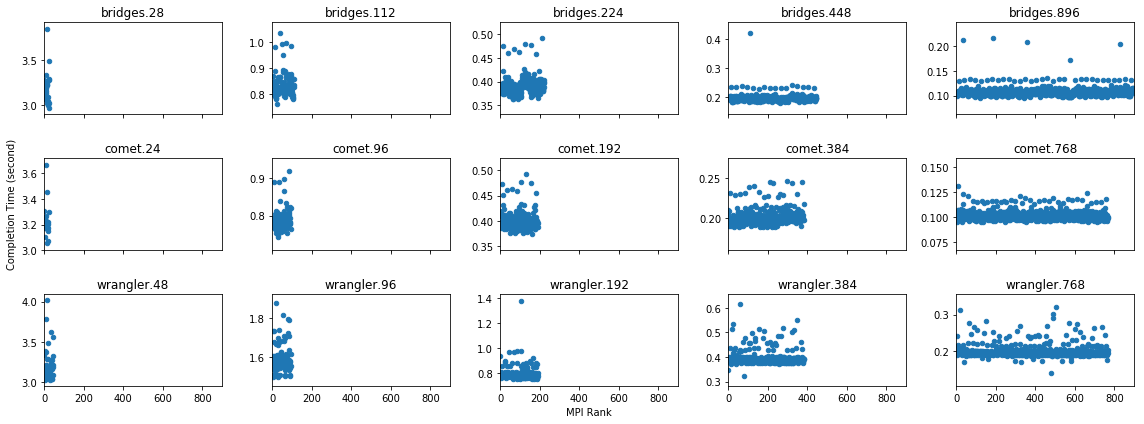

In [8]:
plt.figure()
#df.diff().plot.kde( figsize=(6,6), sharex=True, sharey=True)
#df.diff().hist(log=True, figsize=(6,6), sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(16,6))
row = col = 0
ax0 = None
for resource_name, core_list in entry.items():
    for num_cores in core_list:
        ax = df.reset_index().plot.scatter(x='index',y='{}.{}'.format(resource_name, num_cores), sharex=True, ax=axes[row,col])
        ax.set_xlim([0, 900])
        if row == 0 and col == 0:
            ax0 = ax
        if row == 2 and col == 2:
            ax.set_xlabel('MPI Rank')
        else:
            ax.set_xlabel('')
        if row == 1 and col == 0:
            ax.set_ylabel('Completion Time (second)')
        else:
            ax.set_ylabel('')
        ax.set_title('{}.{}'.format(resource_name, num_cores))
        col += 1
    row += 1
    col = 0
fig.tight_layout()
plt.show()

### Throughput (frames/sec) on Bridges

Completion time in the previous plots has different scales but a throughput of frames per second has a same magnitude to plot.

For example of Bridges, see the next plot:

In [6]:
b28=df["bridges.28"].reset_index()
b112=df["bridges.112"].reset_index()
b224=df["bridges.224"].reset_index()
b448=df["bridges.448"].reset_index()
b896=df["bridges.896"].reset_index()
fig = {
    'data': [
        {
            'y': 2512200 / 28 / b28['bridges.28'],
            'x': b28.index,
            'mode': 'markers',
            'name': '28 cores'
        },
        {
            'y': 2512200 / 112 / b112["bridges.112"],
            'x': b112.index,
            'mode': 'markers',
            'name': '112 cores'            
        },
        {
            'y': 2512200 / 224 / b224['bridges.224'],
            'x': b224.index,
            'mode': 'markers',
            'name': '224 cores'
        },
        {
            'y': 2512200 / 448 / b448['bridges.448'],
            'x': b448.index,
            'mode': 'markers',
            'name': '448 cores'
        },
        {
            'y': 2512200 / 896 / b896['bridges.896'],
            'x': b896.index,
            'mode': 'markers',
            'name': '896 cores'
        }
        
    ],
    'layout': {
        'title': 'Bridges',
        'width': 800,
        'height': 400,
        'xaxis': {'title': 'MPI Rank', 'showline': True},
        'yaxis': {'title': 'Throughput (frames/s)', 'type': 'log', 
                  'showgrid':True, 
                  'showline':True, 
                  'gridcolor':'#bdbdbd',
                  'gridwidth':1}
    }
}
plotly.offline.iplot(fig)